## *Lab 8 - fMNIST Classification with Dense Neural Networks (using Tensorflow)*

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization

*Variables*

In [52]:
test_size = 0.2 
random_state = 23
epochs = 100
batch_size = 32

### *Dataset Overview*

Fashion-MNIST is a collection of Zalando's article images. The dataset offers a diverse range of fashion items, making it an interesting alternative to the traditional digit-based MNIST dataset. Some of its key features include:

Size and Split: It comprises a training set of 60,000 examples and a test set of 10,000 examples, mirroring the splits in the original MNIST.

Image Details: Each example in the dataset is a 28x28 grayscale image, ensuring that researchers and practitioners can use the same input dimensions as the MNIST dataset.

Labels: The dataset is categorized into 10 distinct fashion classes, providing a multi-class classification challenge.

Each training and test example is assigned to one of the following labels:

‣ 0 T-shirt/top

‣ 1 Trouser

‣ 2 Pullover

‣ 3 Dress

‣ 4 Coat

‣ 5 Sandal

‣ 6 Shirt

‣ 7 Sneaker

‣ 8 Bag

‣ 9 Ankle boot

Purpose: Zalando introduced Fashion-MNIST with the intention of it serving as a direct drop-in replacement for the original MNIST. This allows for an easy transition for those wanting to benchmark machine learning algorithms on a more contemporary dataset while retaining the familiarity of MNIST's structure.
In subsequent sections, we will delve deeper into implementing a Convolutional Neural Network (CNN) using Tensorflow and Keras to classify the images in the Fashion-MNIST dataset.

### *Exploratory Data Analysis*

#### ➼ [Kaggle Reference](https://www.kaggle.com/code/fabinahian/eda-of-fashion-mnist-using-cnn#%E2%9A%A1%EF%B8%8F-CONFUSION-MATRIX)

In [53]:
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

# Convert pandas DataFrames to numpy arrays
train_labels = train_data['label'].values
train_features = train_data.drop('label', axis=1).values.reshape(-1, 28, 28)

test_labels = test_data['label'].values
test_features = test_data.drop('label', axis=1).values.reshape(-1, 28, 28)

In [54]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


*Comment: In both train data & test data, there are 785 columns, out of which, the 1st column is the label & the rest are the input features.*

*Shape of the data*

In [56]:
print("Train Data\n")
print("Rows: ", train_data.shape[0])
print("Columns: ", train_data.shape[1])
print("\n")

print("Test Data\n")
print("Rows: ", test_data.shape[0])
print("Columns: ", test_data.shape[1])

Train Data

Rows:  60000
Columns:  785


Test Data

Rows:  10000
Columns:  785


In [57]:
#checking how many data we have for each category
train_data['label'].value_counts()

label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64

<Axes: xlabel='label'>

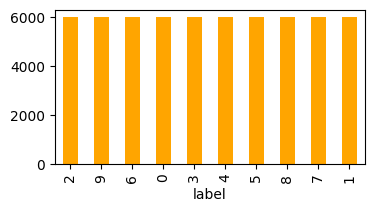

In [58]:
train_data['label'].value_counts().plot(kind = 'bar', figsize = (4,2), color = 'orange')

*Comment: Each label has 6000 training data. So, there's no imbalance in the training data.*

In [59]:
test_data['label'].value_counts()

label
0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: count, dtype: int64

<Axes: xlabel='label'>

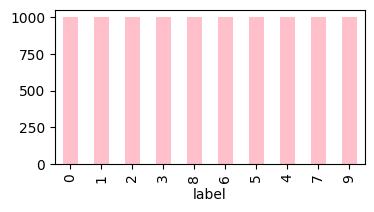

In [60]:
test_data['label'].value_counts().plot(kind = 'bar', figsize = (4,2), color = 'pink')

*Comment:  Each label has 1000 testing data. So, there's no imbalance in the testing data.*

 ### *Data Visualization*

In [61]:
# Mapping classes to their respective labels

apparel_items = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

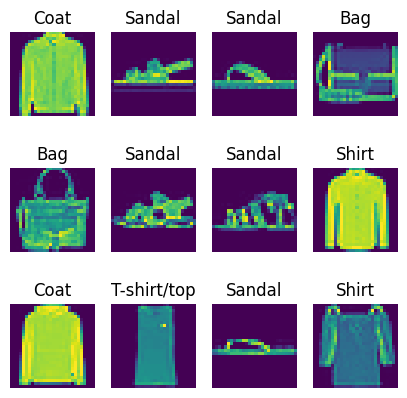

In [62]:
fig, axes = plt.subplots(3, 4, figsize = (5,5))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = train_data.drop('label', axis=1).values[index].reshape(28,28)
        train_item = train_data['label'][index]
        axe.imshow(img)
        axe.set_title(apparel_items[train_item])
        axe.set_axis_off()

*Data Pre-processing*

In [63]:
def data_preprocessing(raw):
    label = tf.keras.utils.to_categorical(raw.label, 10)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    image = x_shaped_array / 255 #normalization
    return image, label

X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

In [64]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)

*CNN Model*

In [65]:
model = tf.keras.Sequential()

# First layer, which has a 2D Convolutional layer with kernel size as 3x3 and Max pooling operation 
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Second layer, which has a 2D Convolutional layer with kernel size as 3x3 & ReLU activation and Max pooling operation 
model.add(Conv2D(64, (3,3), padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Fully connected layer with ReLU activation function 
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))

# Output layer with softmax activation function
model.add(Dense(10, activation=tf.nn.softmax))

In [66]:
# Optimizer specified here is adam, loss is categorical crossentrophy and metric is accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [71]:
history = model.fit(X_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/100
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0406 - accuracy: 0.9851 - val_loss: 0.4358 - val_accuracy: 0.9172
Epoch 2/100
1500/1500 [==============================] - 40s 27ms/step - loss: 0.0376 - accuracy: 0.9870 - val_loss: 0.4492 - val_accuracy: 0.9165
Epoch 3/100
1500/1500 [==============================] - 38s 26ms/step - loss: 0.0318 - accuracy: 0.9886 - val_loss: 0.4960 - val_accuracy: 0.9159
Epoch 4/100
1500/1500 [==============================] - 38s 26ms/step - loss: 0.0310 - accuracy: 0.9894 - val_loss: 0.4200 - val_accuracy: 0.9171
Epoch 5/100
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0301 - accuracy: 0.9890 - val_loss: 0.5150 - val_accuracy: 0.9186
Epoch 6/100
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0249 - accuracy: 0.9913 - val_loss: 0.5332 - val_accuracy: 0.9169
Epoch 7/100
1500/1500 [==============================] - 44s 29ms/step - loss: 0.0265 - accuracy: 0.9909 - val_loss: 0

In [69]:
import math

score = model.evaluate(X_test, y_test, steps=math.ceil(10000/32))
# checking the test loss and test accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.4252 - accuracy: 0.9112
Test loss: 0.4251611828804016
Test accuracy: 0.9111999869346619


### *Visualizing Model's Accuracy and Loss over Epochs*

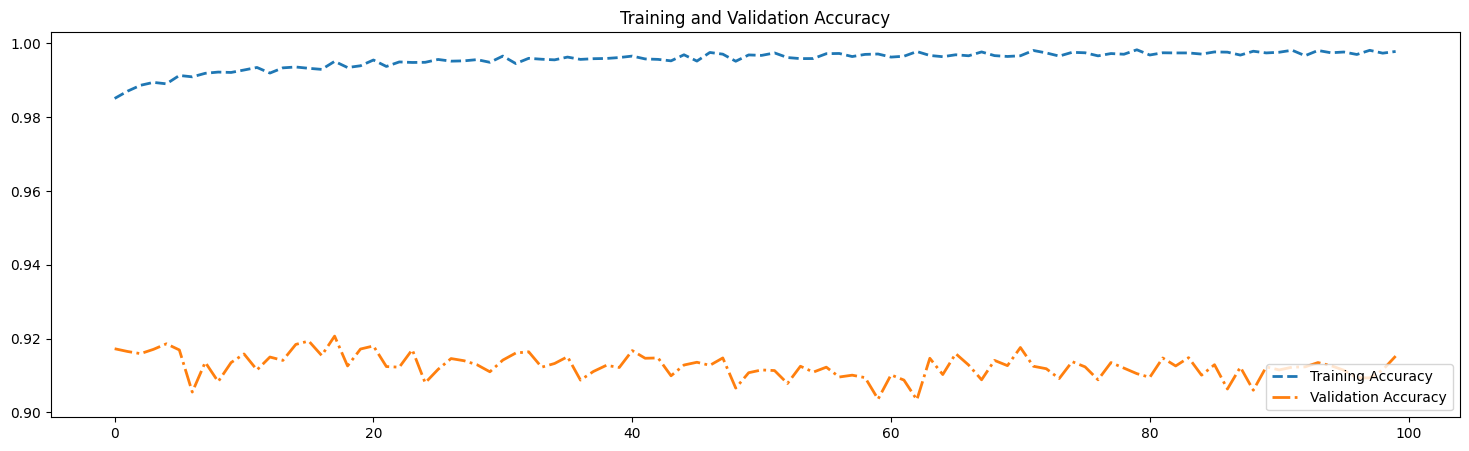

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


# PLOTTING THE DATA [ACCURACY]

plt.figure(figsize=(40,5))
plt.subplot(1,2,1)

plt.plot(range(epochs),acc, "--",label='Training Accuracy',linewidth=2.0)
plt.plot(range(epochs),val_acc, "-.",label='Validation Accuracy',linewidth=2.0)

plt.legend(loc='lower right')

plt.title('Training and Validation Accuracy')

plt.savefig('Training and Validation Accuracy.svg',bbox_inches='tight')




*Insights from Model Accuracy*

Blue Line: Symbolizes the trajectory of training accuracy across epochs.

Orange Line: Illustrates the progression of validation accuracy throughout the training process.

○ The model is learning from the training data as evidenced by the steady increase in training accuracy over epochs.

○ The model is generalizing well to unseen data, indicated by the increasing trend in validation accuracy.

○ There’s no significant gap between training and validation accuracy, suggesting that the model is not overfitting (memorizing the training data).

○ The model doesn’t seem to be underfitting (failing to capture underlying patterns) as both accuracies are reasonably high.

○ The model’s performance might improve with more epochs, but it’s important to monitor for overfitting.

These insights help understand the model’s learning process and its ability to generalize to new data. They also guide potential improvements, like adjusting the number of epochs. However, actual performance can vary based on factors like model complexity and data quality. Experimenting with different hyperparameters and techniques is often necessary for optimization.

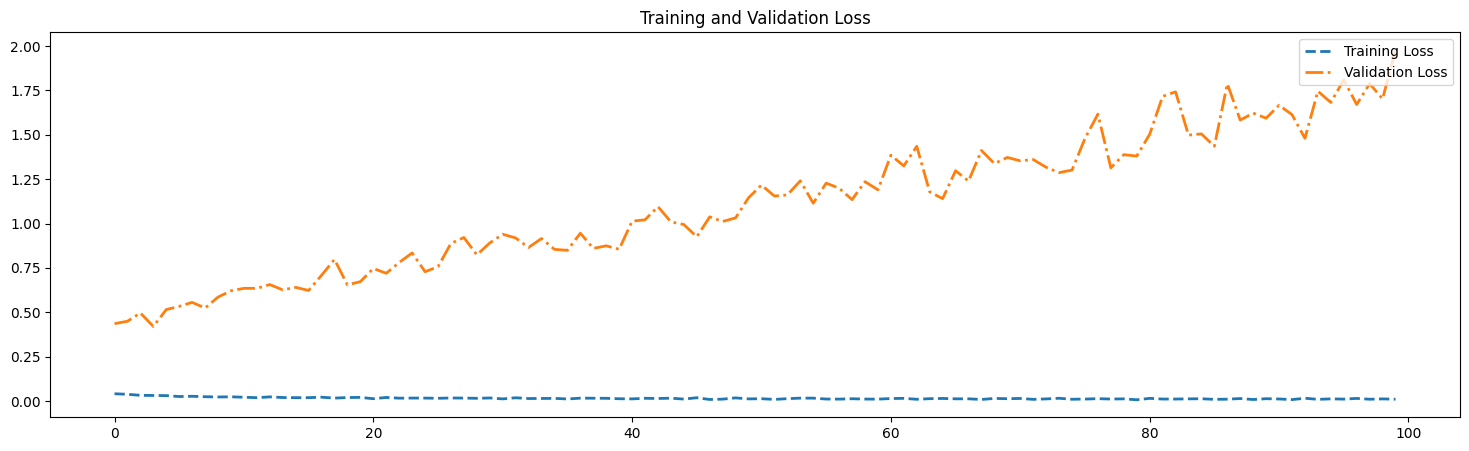

In [73]:
# PLOTTING THE DATA [LOSS]

plt.figure(figsize=(40,5))
plt.subplot(1,2,1)

plt.plot(range(epochs),loss,"--",label='Training Loss',linewidth=2.0)
plt.plot(range(epochs),val_loss,"-.",label='Validation Loss',linewidth=2.0)

plt.legend(loc='upper right')

plt.title('Training and Validation Loss')

plt.savefig('Training and Validation Loss.svg',bbox_inches='tight')

*Insights from Model Loss*

Blue Line: Depicts the trajectory of training loss across epochs.

Orange Line: Represents the trend of validation loss throughout the training duration.

○ Both the Training Loss and Validation Loss decrease as the number of epochs increases, which indicates that the model is learning and improving its performance over time.

○ The Training Loss starts around 0.50 and ends close to 0.30. This steady decrease suggests that the model is effectively learning from the training data.

○ The Validation Loss starts slightly below 0.45 and fluctuates between approximately 0.35 and just above 0.30 after epoch 2. The fact that the validation loss decreases initially and then plateaus might suggest that the model is not significantly overfitting or underfitting the validation data.

### *Accuracy, Precision, Recall, F1*

In [ ]:
class_names = ['T-shirt/top',
            'Trouser',
            'Pullover',
            'Dress',
            'Coat',
            'Sandal',
            'Shirt',
            'Sneaker',
            'Bag',
            'Ankle boot']
            
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

report = classification_report(y_true,y_pred_classes, target_names= class_names)
print(report)

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.85      0.86      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.89      0.84      0.87      1000
       Dress       0.90      0.93      0.92      1000
        Coat       0.85      0.89      0.87      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.79      0.75      0.77      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



From this report, we can observe the following:

High Precision for Certain Classes: The model demonstrates high precision for classes such as Trouser, Sandal, Sneaker, and Bag, suggesting that it accurately predicts these classes with a low rate of false positives.

Lower Precision for Some Classes: The precision for classes like Pullover, Coat, and Shirt is relatively lower, indicating that the model tends to misclassify instances of these classes more frequently, leading to a higher rate of false positives.

Overall Accuracy: The model achieves an overall accuracy of 82%, which means it correctly predicts the class for 82% of the instances in the test dataset. This provides a general overview of the model's performance across all classes.

### *Visualizing Predictions*

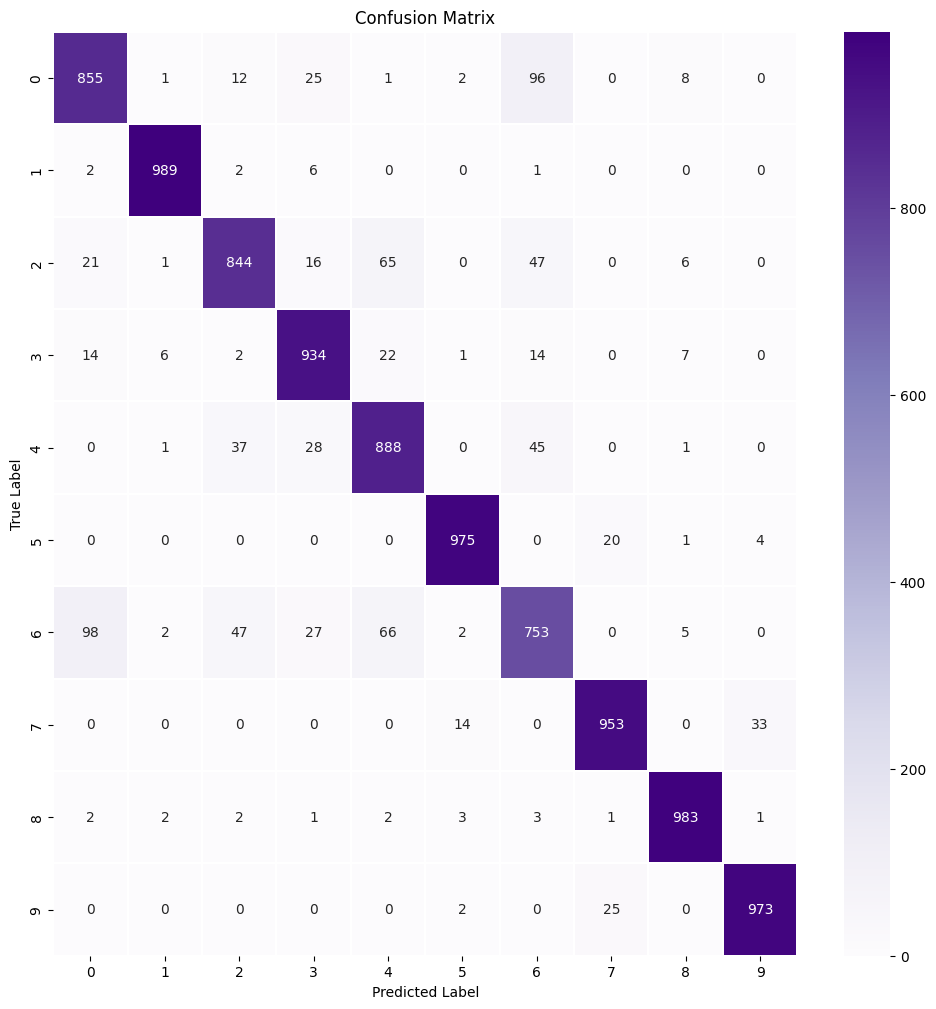

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

f,ax = plt.subplots(figsize = (7,7))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "Purples", linecolor="white", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

1/1 [==============================] - 0s 99ms/step


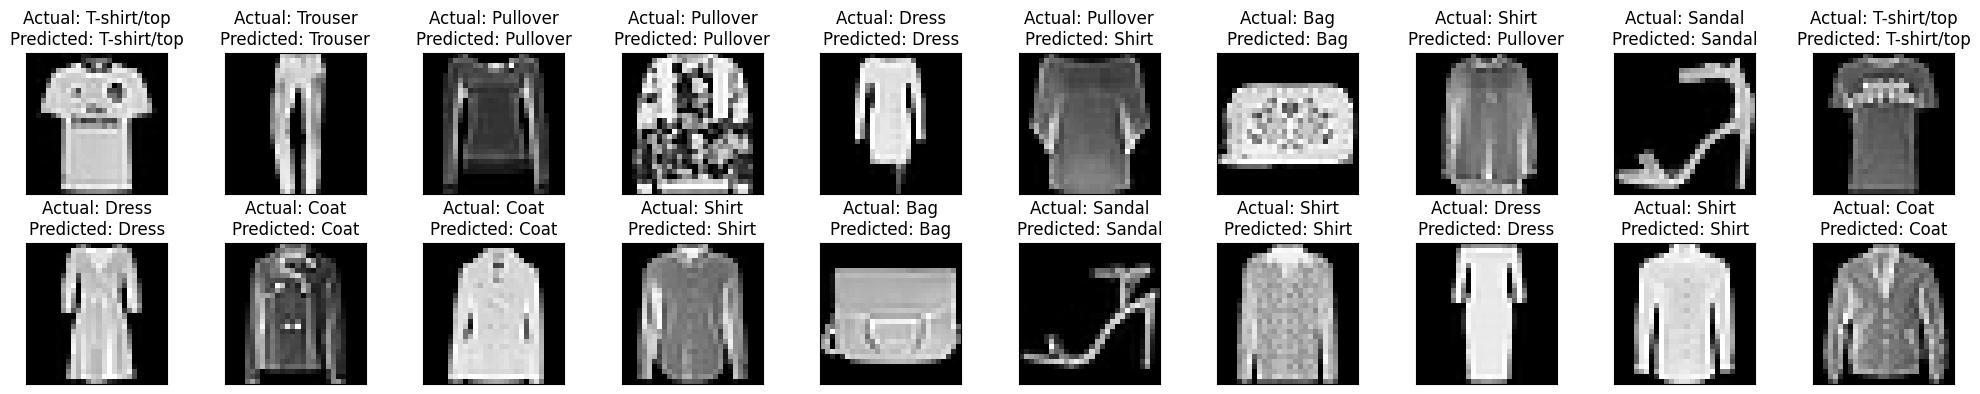

In [ ]:
# Select a range of indices (0 to 19) to visualize
mask = range(0, 20)

# Extract the selected samples from X_test and their corresponding true labels
X_selected = X_test[mask]
y_true_selected = y_test[mask]

# Use the model to predict the classes for the selected test set
y_pred_prob_selected = model.predict(X_selected)
y_pred_selected = np.argmax(y_pred_prob_selected, axis=-1)

# Convert one-hot encoded labels back to integer labels if necessary
if len(y_true_selected.shape) > 1 and y_true_selected.shape[1] > 1:
    y_true_selected = np.argmax(y_true_selected, axis=-1)

# Visualizing the selected test images with actual and predicted labels
plt.figure(figsize=(20, 4))
for i in range(len(mask)):
    ax = plt.subplot(2, len(mask)//2, i + 1)
    plt.imshow(X_selected[i].reshape(28, 28), cmap='gray')
    actual_class = class_names[y_true_selected[i]]
    predicted_class = class_names[y_pred_selected[i]]
    ax.set_title(f"Actual: {actual_class}\nPredicted: {predicted_class}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

*Insight*

Model Predictions: The model is consistently predicting “Pullover” for various types of clothing items. This indicates a potential problem in either the training data, model architecture, or other aspects of the machine learning pipeline.

Model Performance: The model’s performance is not satisfactory as it is unable to correctly classify different types of clothing items. This could be due to a variety of reasons such as insufficient training, a model architecture that is too simple to capture the complexity of the data, or overfitting to the training data.

Data Issues: If the training data is not representative of the data the model is expected to predict on, the model may perform poorly. It’s important to ensure that the training data covers all possible classes and variations within each class.

To improve the model’s performance, we could check the distribution of classes in the training data, experiment with different model architectures, train the model for more epochs, or use techniques like data augmentation. 

In [ ]:
# Make predictions on the test set
predictions = model.predict(test_features)

# Get the predicted probabilities for class '5'
prob_class_5 = predictions[:, 5]

# Set a high decision threshold to increase precision for class '5'
high_threshold = 0.8
pred_high_precision = (prob_class_5 > high_threshold).astype(int)

# Print the first 10 high precision predictions for class '5'
print("First 10 high precision predictions for class '5':", pred_high_precision[:10])

# Set a lower decision threshold to increase recall for class '5'
low_threshold = 0.2
pred_high_recall = (prob_class_5 > low_threshold).astype(int)

# Print the first 10 high recall predictions for class '5'
print("First 10 high recall predictions for class '5':", pred_high_recall[:10])

313/313 [==============================] - 2s 5ms/step
First 10 high precision predictions for class '5': [0 0 0 0 0 0 0 0 1 0]
First 10 high recall predictions for class '5': [0 0 0 0 0 0 0 0 1 0]


### *CONCLUSION*

Our CNN model demonstrated proficiency in classifying Fashion MNIST images, with impressive accuracies on both training and testing datasets. However, certain misclassifications, like confusing a Sneaker with a Sandal or a Coat with a Shirt, highlight the challenges of image classification. These instances emphasize the nuances of working with grayscale images where certain features might not be as distinguishable.

To enhance the model's performance further, we can consider augmenting the dataset, fine-tuning hyperparameters, or exploring advanced neural network architectures. The journey towards a perfect model is iterative, and with each step, we aim to inch closer to optimal accuracy and generalization.